# Parte 1: Conceitos básicos para construir uma MLP

Acesse o conteúdo didático [nesse link](https://github.com/alura-cursos/Live-coding-alura-keras/blob/main/Primeiros%20passos%20-%20TF%20Keras%20-%20Apresenta%C3%A7%C3%A3o%20em%20slides.pdf)

# Parte 2: Processando os dados

Você pode manter os dados salvos em seu notebook com o código abaixo:
```Python
url = 'https://raw.githubusercontent.com/alura-cursos/Live-coding-alura-keras/refs/heads/main/novas_notas.csv'
url_novos = 'https://raw.githubusercontent.com/alura-cursos/Live-coding-alura-keras/refs/heads/main/novas_notas.csv'
```

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/Live-coding-alura-keras/refs/heads/main/autenticacao_notas.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(url)
df

,Variância,Assimetria,Curtose,Entropia,Classe
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1365,0.40614,1.34920,-1.4501,-0.55949,1
1366,-1.38870,-4.87730,6.4774,0.34179,1
1367,-3.75030,-13.45860,17.5932,-2.77710,1
1368,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df.Classe.unique()

array([0, 1])

In [ ]:
X = df.drop('Classe',axis=1).values
y = df.Classe.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

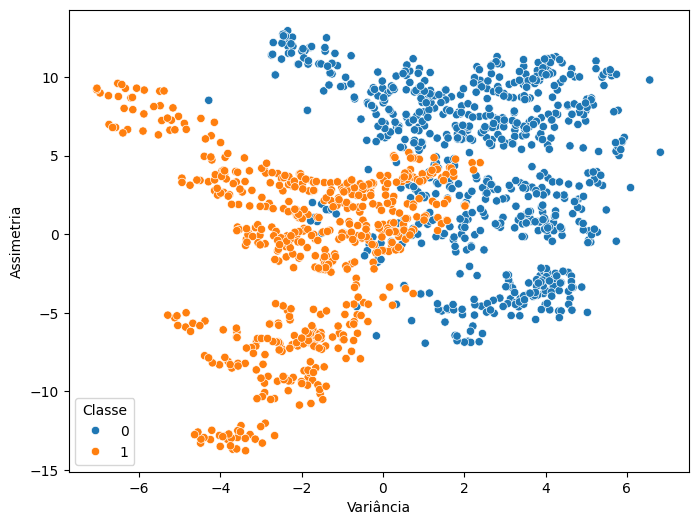

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Variância'],y=df['Assimetria'], hue=df['Classe'])
plt.legend(title='Classe')
plt.show()

# Parte 3: Construindo a MLP

In [ ]:
import tensorflow as tf

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_treino.shape[1],)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics= ['accuracy'])

In [ ]:
historico = modelo.fit(X_treino, y_treino,epochs=15, validation_split = 0.2)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5675 - loss: 0.6396 - val_accuracy: 0.7136 - val_loss: 0.5792
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.5426 - val_accuracy: 0.8045 - val_loss: 0.4893
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 0.4476 - val_accuracy: 0.8636 - val_loss: 0.4122
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.3728 - val_accuracy: 0.9136 - val_loss: 0.3470
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9232 - loss: 0.3160 - val_accuracy: 0.9273 - val_loss: 0.2874
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9456 - loss: 0.2533 - val_accuracy: 0.9364 - val_loss: 0.2376
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9397 - loss: 0.2139 - val_accuracy: 0.9545 - val_loss: 0.1967
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9532 - loss: 0.1761 - val_accuracy: 0.9636 - val_loss